In [28]:
# Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [29]:
# Load the data
from google.colab import files
uploaded = files.upload()

Saving GOOGL_till_22.csv to GOOGL_till_22 (2).csv


In [30]:
# Store the data into a data frame
df = pd.read_csv('GOOGL_till_22.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
5,2004-08-26,52.527527,54.029030,52.382381,54.009010,54.009010,7094898


In [31]:
# Get the number of trading days
df.shape
#So there are 4881 trading days in this dataset and there are 252-253 trading days in a year so i have data from 2002 to 2021

(4431, 7)

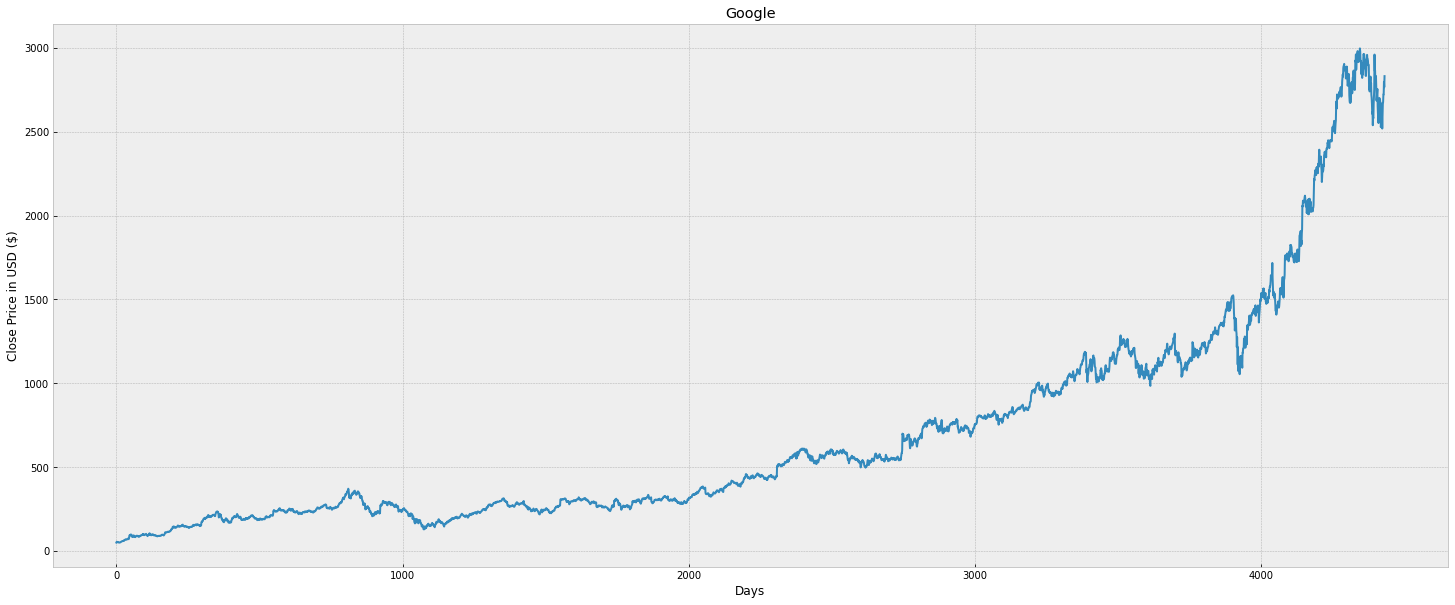

In [32]:
#Visualize the Close Price data
plt.figure(figsize=(25,10))
plt.title('Google')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])   # We plot a specific label from dataset
plt.show()

In [33]:
# Get the close price
#Basically creating a new dataframe for close price
df = df[['Close']]
df.head(4)

,Close
0,50.220219
1,54.209209
2,54.754753
3,52.487488


In [34]:
# Create a variable to predict 'x' days out into the future
future_days = 100       #Specify no. of days to predict in future
# Create a new column containing target data that will be predicting values x days out into the future
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)    # shows close price and prediction
df.tail()     # has no values in prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
4426,2722.510010,NaN
4427,2722.030029,NaN
4428,2797.360107,NaN
4429,2765.510010,NaN
4430,2831.439941,NaN


In [35]:
# Create the future dataset, call it X and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]         #We want all of the days except of the last 'x' days
print(X)

[[  50.220219]
 [  54.209209]
 [  54.754753]
 ...
 [2924.350098]
 [2916.97998 ]
 [2960.919922]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [36]:
#Create the target dataset, call it y and convert it to a numpy array and get all of the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[  96.866867   97.787788   97.762764 ... 2797.360107 2765.51001
 2831.439941]


In [37]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)       
#Here we provide as input X i.e. the future dataset and y i.e. the target dataset and test size

In [38]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [39]:
#Now we will get the last 'x' rows from the future dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]   #As we want all of the rows except for the last 'x' rows
x_future = x_future.tail(future_days)
#Convert dataset to a numpy array
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[2435.129883],
       [2430.199951],
       [2448.909912],
       [2428.389893],
       [2415.449951],
       [2434.870117],
       [2402.219971],
       [2436.25    ],
       [2446.610107],
       [2442.540039],
       [2450.      ],
       [2450.169922],
       [2450.719971],
       [2445.449951],
       [2441.790039],
       [2448.889893],
       [2505.149902],
       [2523.800049],
       [2529.47998 ],
       [2500.879883],
       [2510.370117],
       [2539.51001 ],
       [2546.830078],
       [2564.73999 ],
       [2540.100098],
       [2539.399902],
       [2491.560059],
       [2524.189941],
       [2550.97998 ],
       [2568.429932],
       [2660.300049],
       [2680.699951],
       [2638.      ],
       [2721.879883],
       [2715.550049],
       [2694.530029],
       [2697.090088],
       [2712.600098],
       [2702.51001 ],
       [2725.030029],
       [2714.77002 ],
       [2738.26001 ],
       [2736.139893],
       [2725.580078],
       [2743.879883],
       [27

In [40]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model Linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

#Here on the top we have the tree prediction for the decision tree regressor.
#And on bottom is the predictions for the Linear Regression model

[2869.939941 2869.939941 2931.959961 2869.939941 2960.919922 2869.939941
 2924.350098 2917.870117 2926.040039 2973.560059 2969.040039 2957.52002
 2960.939941 2973.560059 2978.530029 2926.040039 2915.639893 2922.399902
 2952.77002  2910.610107 2837.949951 2821.030029 2859.320068 2916.530029
 2863.100098 2821.030029 2963.72998  2952.77002  2960.030029 2916.530029
 2689.189941 2928.820068 2888.899902 2834.5      2832.139893 2869.449951
 2869.449951 2938.330078 2958.129883 2933.73999  2933.100098 2924.01001
 2924.01001  2899.830078 2887.98999  2755.5      2754.949951 2740.340088
 2773.389893 2794.719971 2828.610107 2771.73999  2648.590088 2719.959961
 2648.590088 2666.149902 2607.030029 2616.080078 2616.080078 2584.659912
 2580.100098 2784.02002  2706.070068 2752.879883 2960.       2754.76001
 2865.860107 2784.02002  2752.879883 2831.840088 2638.129883 2685.649902
 2771.73999  2668.399902 2754.76001  2668.399902 2608.060059 2596.27002
 2689.189941 2653.820068 2689.189941 2701.139893 2681.2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


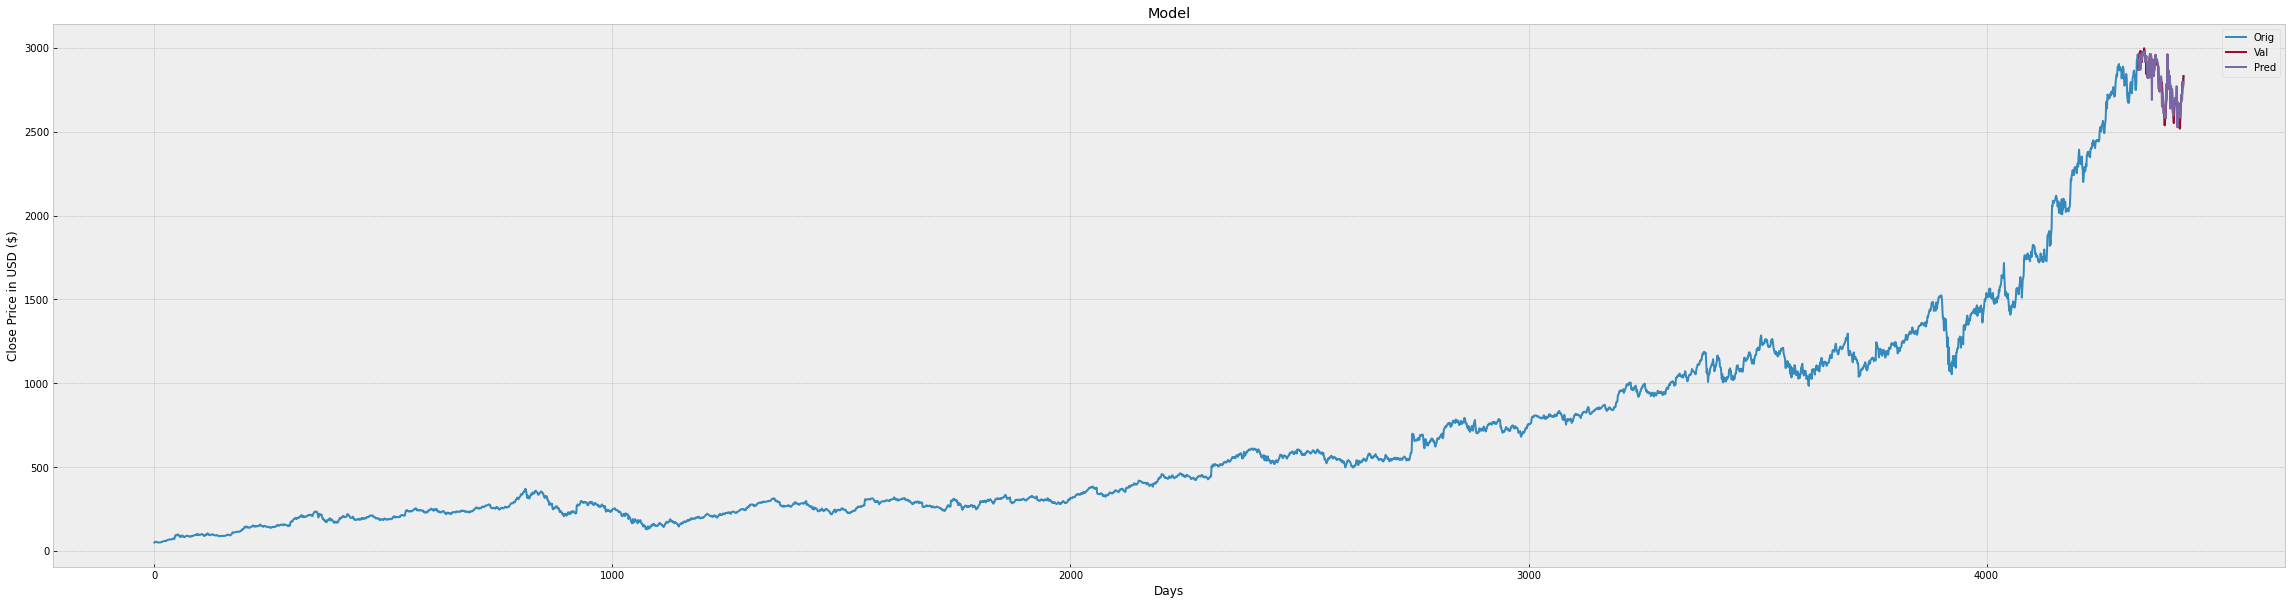

In [43]:
#This prediction is for decision tree regressor 
# Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]    #This will be our valid data
valid['Predictions'] = predictions

#Plotting the data
plt.figure(figsize=(40,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


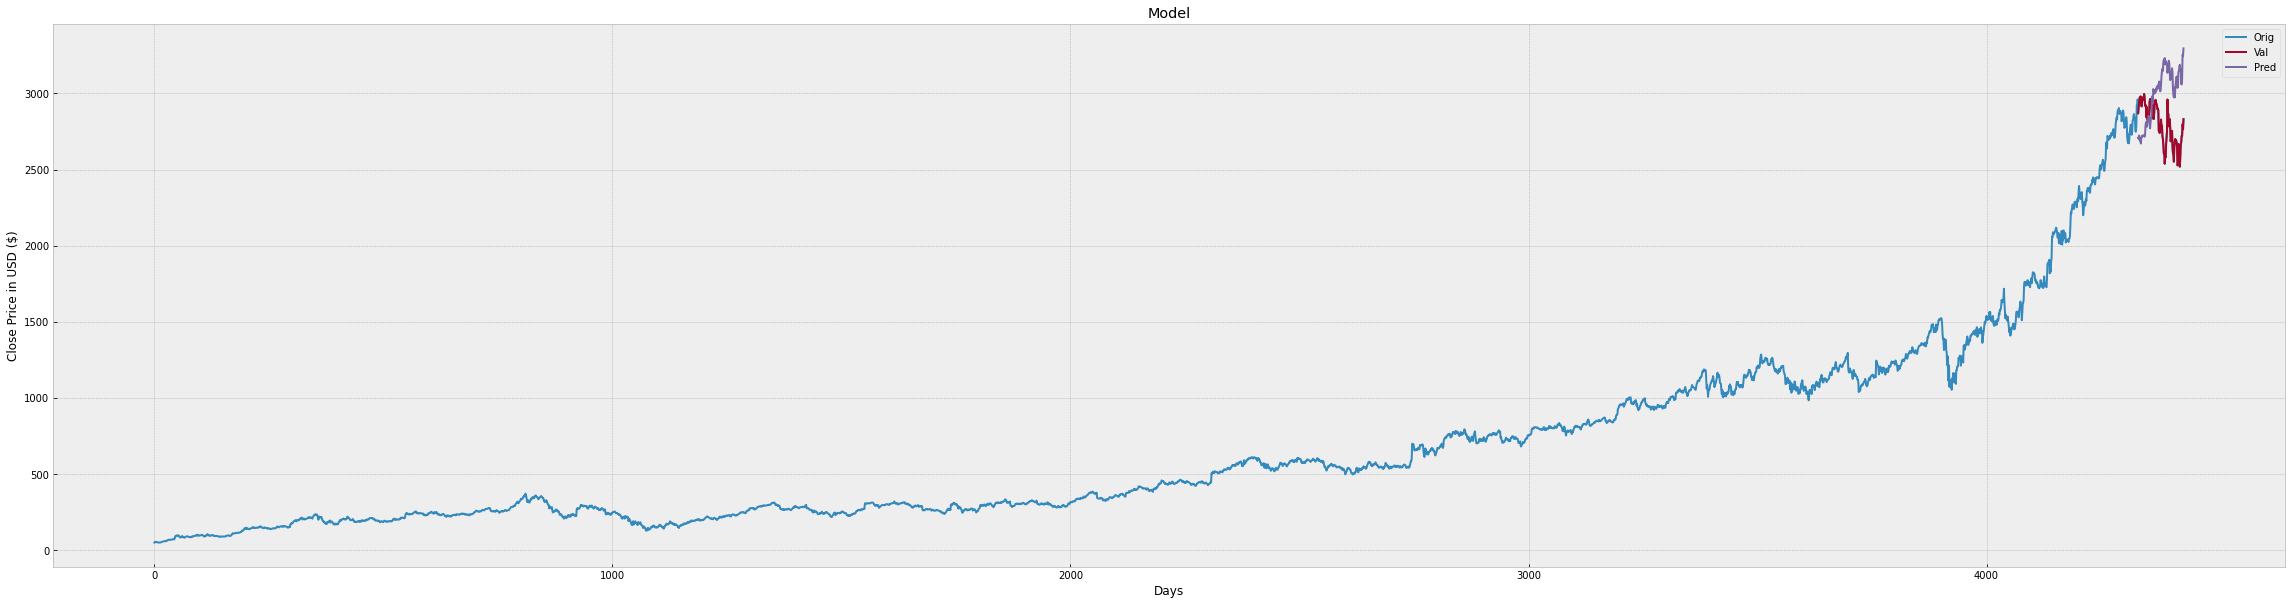

In [44]:
#This prediction is for linear regression 
# Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]    #This will be our valid data
valid['Predictions'] = predictions

#Plotting the data
plt.figure(figsize=(40,10))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [42]:
import pickle
vec_file = 'vectorizer.pickle'
pickle.dump(cv, open(vec_file, 'wb'))

# Save the model
mod_file = 'classification.model'
pickle.dump(model, open(mod_file, 'wb'))